In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("/Finance - Highest Countries by Long-Term Interest Rates.csv")
data.sample(n = 7)

,Country,region,11,janv-87,janv-87.1,janv-87.2,Feb-1987,mars-87,Apr-1987,May-1987,...,nov-18,Dec-2018,janv-19,Feb-2019,mars-19,Apr-2019,May-2019,juin-19,juil-19,Aug-2019
28,Slovenia,29,https://www.countryflags.io/si/flat/64.png,..,..,..,..,..,..,..,...,1.0,1.0,1.0,0.9,0.7,0.5,0.4,0.2,-0.0,..
20,Luxembourg,21,https://www.countryflags.io/lu/flat/64.png,..,..,..,..,..,..,..,...,0.5,0.4,0.4,0.3,0.2,0.1,0.0,-0.2,-0.3,..
13,Ireland,14,https://www.countryflags.io/ie/flat/64.png,12.5,12.5,12.5,12.7,12.0,10.9,10.6,...,0.9,0.9,0.9,0.8,0.6,0.5,0.4,0.2,0.1,-0.1
30,Sweden,31,https://www.countryflags.io/se/flat/64.png,11.7,11.7,11.7,11.5,11.2,11.2,11.8,...,0.6,0.5,0.4,0.4,0.3,0.2,0.1,-0.1,-0.1,-0.3
37,Russia,38,https://www.countryflags.io/ru/flat/64.png,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
10,Greece,11,https://www.countryflags.io/gr/flat/64.png,..,..,..,..,..,..,..,...,4.4,4.3,4.2,3.8,3.8,3.4,3.4,2.7,2.2,..
31,Switzerland,32,https://www.countryflags.io/ch/flat/64.png,3.9,3.9,3.9,4.0,4.0,4.0,4.1,...,-0.0,-0.2,-0.2,-0.2,-0.4,-0.3,-0.4,-0.5,-0.7,-1.0


Highest Countries in total received FDI

First of all I would like to check if there are any missing information in the table and how can this be overcome in order to get a better statistics result

In [6]:
data.iloc[:,1:] = data.iloc[:,1:].apply(pd.to_numeric, errors='coerce')
data.isnull().sum()

,0
Country,0
region,0
11,39
janv-87,23
janv-87.1,23
...,...
Apr-2019,3
May-2019,1
juin-19,1
juil-19,3


There are a lot of misses I would like to remove all the columns where there are more than 50% of missing values for a better results and replace missing values with 0

In [7]:
data = data.dropna(axis=1,thresh = len(data)*0.5)
data = data.fillna(0)
data.head()

,Country,region,mars-91,Apr-1991,May-1991,juin-91,juil-91,Aug-1991,sept-91,oct-91,...,nov-18,Dec-2018,janv-19,Feb-2019,mars-19,Apr-2019,May-2019,juin-19,juil-19,Aug-2019
0,Australia,1,11.4,11.0,10.8,11.2,11.0,10.7,10.3,9.8,...,2.7,2.4,2.3,2.1,2.0,1.9,1.7,1.4,1.3,1.0
1,Austria,2,8.4,8.4,8.4,8.5,8.6,8.7,8.6,8.5,...,0.6,0.5,0.5,0.5,0.4,0.3,0.2,0.0,-0.1,-0.4
2,Belgium,3,9.2,9.2,9.1,9.3,9.5,9.4,9.2,9.1,...,0.8,0.8,0.8,0.7,0.5,0.5,0.4,0.2,0.0,-0.3
3,Canada,4,9.6,9.5,9.6,9.8,10.0,9.8,9.6,9.1,...,2.4,2.1,2.0,1.9,1.7,1.7,1.7,1.5,1.5,1.2
4,Chile,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.5,4.3,4.2,4.1,4.1,3.9,3.8,3.5,3.2,2.7


In [8]:
data['FDI_sum'] = data.iloc[:,1:-1].sum(axis = 1)
data.sample(frac = 0.05)

<ipython-input-8-2d0a2f02ed22>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['FDI_sum'] = data.iloc[:,1:-1].sum(axis = 1)


,Country,region,mars-91,Apr-1991,May-1991,juin-91,juil-91,Aug-1991,sept-91,oct-91,...,Dec-2018,janv-19,Feb-2019,mars-19,Apr-2019,May-2019,juin-19,juil-19,Aug-2019,FDI_sum
0,Australia,1,11.4,11.0,10.8,11.2,11.0,10.7,10.3,9.8,...,2.4,2.3,2.1,2.0,1.9,1.7,1.4,1.3,1.0,1910.7
6,Denmark,7,9.3,9.2,9.1,9.2,9.3,9.3,9.1,9.0,...,0.2,0.2,0.1,0.2,0.1,0.0,-0.2,-0.3,0.0,1438.2


Let's sort countries by their total FDI and try to find some trend over the years

In [9]:
data = data.sort_values(by = 'FDI_sum', ascending = False)
data.drop(columns = ['region'], inplace = True)
data.head()

,Country,mars-91,Apr-1991,May-1991,juin-91,juil-91,Aug-1991,sept-91,oct-91,nov-91,...,Dec-2018,janv-19,Feb-2019,mars-19,Apr-2019,May-2019,juin-19,juil-19,Aug-2019,FDI_sum
38,South Africa,15.6,15.8,16.0,16.3,16.4,16.8,16.8,17.2,16.8,...,9.5,9.3,9.3,9.2,9.1,9.1,9.0,8.8,9.0,3804.1
37,Russia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500.6
12,Iceland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.4,5.2,5.2,4.5,4.1,3.9,3.8,3.9,0.0,2375.3
23,New Zealand,11.3,10.8,10.0,9.8,9.8,9.9,9.4,8.9,8.9,...,2.5,2.3,2.2,2.0,2.0,1.8,1.6,1.6,1.1,1988.0
15,Italy,13.8,13.4,13.1,13.1,13.3,13.4,13.0,12.8,12.9,...,3.0,2.8,2.8,2.7,2.6,2.6,2.3,1.7,1.4,1949.4


have found the mean value per month received

In [10]:
mean = data.iloc[:,1:-1].sum(axis = 1)/data.shape[1]
mean.head()

,0
38,10.971221
37,10.065698
12,6.867151
23,5.712500
15,5.624419


It would be much better if instead of month with a lot of values it just would be years. So I would like to combine months into years

In [11]:
def parse_year(x):
  year = x.split('-')[-1]
  if len(year)== 2:
    return '19'+ year if int(year) > 19 else '20'+year
  return year


yearly_data = data.rename(columns=lambda x: parse_year(x))

annual_data = yearly_data.groupby(lambda x: parse_year(x),axis=1).sum()
# And we move countries column in the beginning
new_columns = ['Country'] + [col for col in annual_data.columns if col != 'Country']
annual_data = annual_data[new_columns]
annual_data.head()

<ipython-input-11-90cba53ea672>:10: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  annual_data = yearly_data.groupby(lambda x: parse_year(x),axis=1).sum()


,Country,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,FDI_sum
38,South Africa,164.4,185.5,167.7,178.0,193.4,185.8,176.3,181.6,178.9,...,102.3,94.9,92.9,99.1,98.1,108.4,108.5,109.6,72.8,3804.1
37,Russia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1048.7,...,96.7,98.1,88.1,101.5,130.6,125.4,108.0,46.8,0.0,3500.6
12,Iceland,0.0,0.0,14.1,83.9,115.8,110.9,104.4,92.0,102.0,...,71.8,74.4,69.5,76.4,75.0,67.3,58.3,64.0,30.6,2375.3
23,New Zealand,97.8,100.9,83.3,91.7,93.4,94.8,86.3,75.5,76.8,...,59.3,44.5,49.2,51.7,41.3,33.2,36.1,33.1,14.6,1988.0
15,Italy,131.8,159.3,134.3,126.3,146.6,112.8,82.4,58.6,56.8,...,65.1,65.9,51.7,34.7,20.6,17.9,25.5,31.5,18.9,1949.4


Let's get the top 5 countries and look for a trend over years with this information

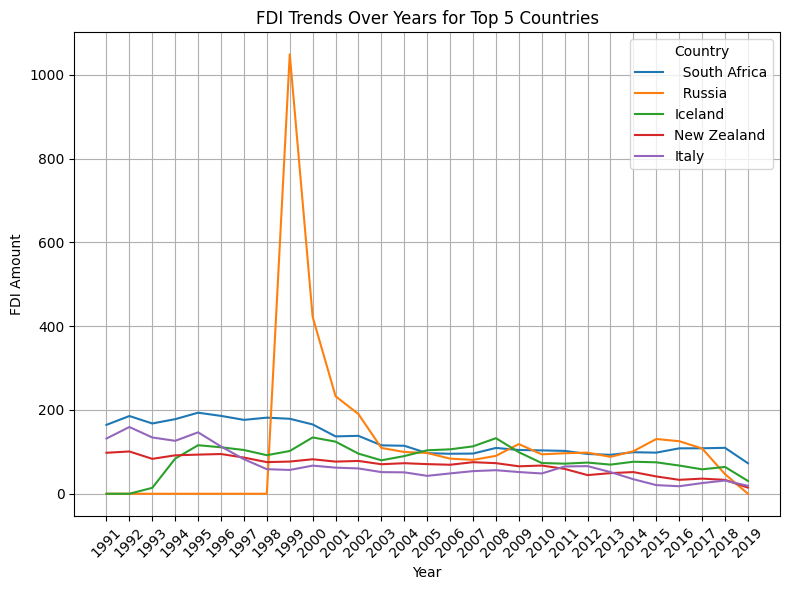

In [12]:
# Filter the data to include only the top 5 countries

top_countries = data.nlargest(5, 'FDI_sum')['Country']
top_countries_data = annual_data[annual_data['Country'].isin(top_countries)]

# Transposing the data for easier plotting

transposed_data = top_countries_data.set_index('Country').loc[:, '1991':'2019'].T

# Plotting
plt.figure(figsize=(8, 6))
for country in transposed_data.columns:
    plt.plot(transposed_data.index, transposed_data[country], label=country)

plt.title('FDI Trends Over Years for Top 5 Countries')
plt.xlabel('Year')
plt.ylabel('FDI Amount')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

The overall trend indicates a consistent decline, with each subsequent year displaying lower figures than its predecessor. Notably, Russia exhibits a peak in 1999, marking the first year for which data is available, suggesting an initial high point in investments for the country.

In both the initial and final years of the dataset, South Africa maintained its position as the leading country.

Iceland began with zero investment but impressively climbed to the top three in overall results.


Italy started in second place, but by the end, it had fallen to the last position among the top countries.

The new Zealand was the most stable country but in the end was ovecome by an Iceland

Now I want to calculate the global FDI to understand which percentage each country or region are in trems of global FDI

I already have a FDI_sum so I want to make a new column for each countries in persentages

In [13]:
global_FDI = data['FDI_sum'].sum()
annual_data['FDI_percentage'] = round((data['FDI_sum']/global_FDI)*100,2)
annual_data.head()

,Country,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,FDI_sum,FDI_percentage
38,South Africa,164.4,185.5,167.7,178.0,193.4,185.8,176.3,181.6,178.9,...,94.9,92.9,99.1,98.1,108.4,108.5,109.6,72.8,3804.1,6.50
37,Russia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1048.7,...,98.1,88.1,101.5,130.6,125.4,108.0,46.8,0.0,3500.6,5.98
12,Iceland,0.0,0.0,14.1,83.9,115.8,110.9,104.4,92.0,102.0,...,74.4,69.5,76.4,75.0,67.3,58.3,64.0,30.6,2375.3,4.06
23,New Zealand,97.8,100.9,83.3,91.7,93.4,94.8,86.3,75.5,76.8,...,44.5,49.2,51.7,41.3,33.2,36.1,33.1,14.6,1988.0,3.40
15,Italy,131.8,159.3,134.3,126.3,146.6,112.8,82.4,58.6,56.8,...,65.9,51.7,34.7,20.6,17.9,25.5,31.5,18.9,1949.4,3.33


Let's try to compare FDI by regions and Groups

First we start with regions for that I will make additional dictionary with countries divided into regions

In [17]:
regions = {
    'Europe': ['Germany', 'France', 'Italy','Iceland','Greece','Spain','Portugal','Ireland','United Kingdom','Norway','Hungary','Sweden','Finland','Belgium','Denmark','Austria','Netherlands','Poland','Latvia','Lithuania','Luxembourg','Switzerland','Slovak Republic','Slovenia','Czech Republic'],
    'America': ['United States', 'Canada', 'Brazil','Colombia','Mexico','Chile','Costa Rica'],
    'Australia': ['Australia'],  # Australia is both a country and a continent
    'Asia': ['China', 'Japan','Russia','New Zealand','Israel','Korea','India'],
    'Africa': ['South Africa']
}

def assign_region(country):
    country = country.strip()
    for region, countries in regions.items():
        if country in countries:
            return region
    return 'Other'

annual_data['Region'] = annual_data['Country'].apply(assign_region)
annual_data.head()

,Country,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,FDI_sum,FDI_percentage,Region
38,South Africa,164.4,185.5,167.7,178.0,193.4,185.8,176.3,181.6,178.9,...,92.9,99.1,98.1,108.4,108.5,109.6,72.8,3804.1,6.50,Africa
37,Russia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1048.7,...,88.1,101.5,130.6,125.4,108.0,46.8,0.0,3500.6,5.98,Asia
12,Iceland,0.0,0.0,14.1,83.9,115.8,110.9,104.4,92.0,102.0,...,69.5,76.4,75.0,67.3,58.3,64.0,30.6,2375.3,4.06,Europe
23,New Zealand,97.8,100.9,83.3,91.7,93.4,94.8,86.3,75.5,76.8,...,49.2,51.7,41.3,33.2,36.1,33.1,14.6,1988.0,3.40,Asia
15,Italy,131.8,159.3,134.3,126.3,146.6,112.8,82.4,58.6,56.8,...,51.7,34.7,20.6,17.9,25.5,31.5,18.9,1949.4,3.33,Europe


Now I would like to plot The piechart of countries distribution amoung the regions and FDI_sum for regions

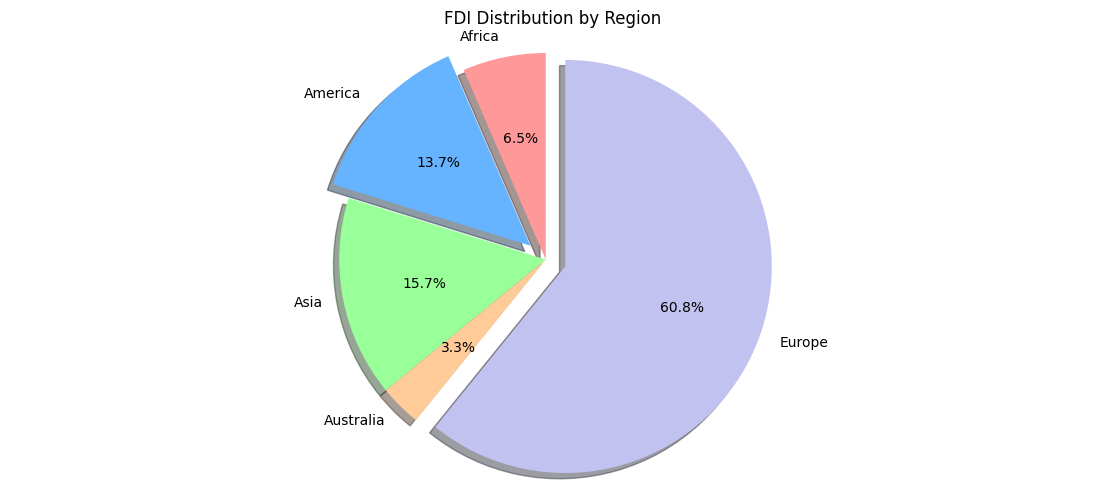

In [20]:
fig, ax1 = plt.subplots( figsize=(14, 6))

# Pie chart for region distribution
region_sum = annual_data.groupby('Region')['FDI_sum'].sum()
ax1.pie(region_sum, labels=region_sum.index, autopct='%1.1f%%', startangle=90,shadow = True, explode = [0,0.1,0,0,0.1], colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']);
ax1.axis('equal')
ax1.set_title('FDI Distribution by Region');


In [36]:
# Convert from wide to long format and remove sum and percentage columns
data_reshaped = annual_data.drop(columns = ['FDI_sum','FDI_percentage'],axis = 1)
data_reshaped = pd.melt(data_reshaped, id_vars=['Country', 'Region'], var_name='Year', value_name='FDI')
# Convert year to integer for plotting
data_reshaped['Year'] = data_reshaped['Year'].astype(int)
# Group by 'Region' and 'Year' and sum up FDI values
grouped_data = data_reshaped.groupby(['Region', 'Year'])['FDI'].sum().reset_index()


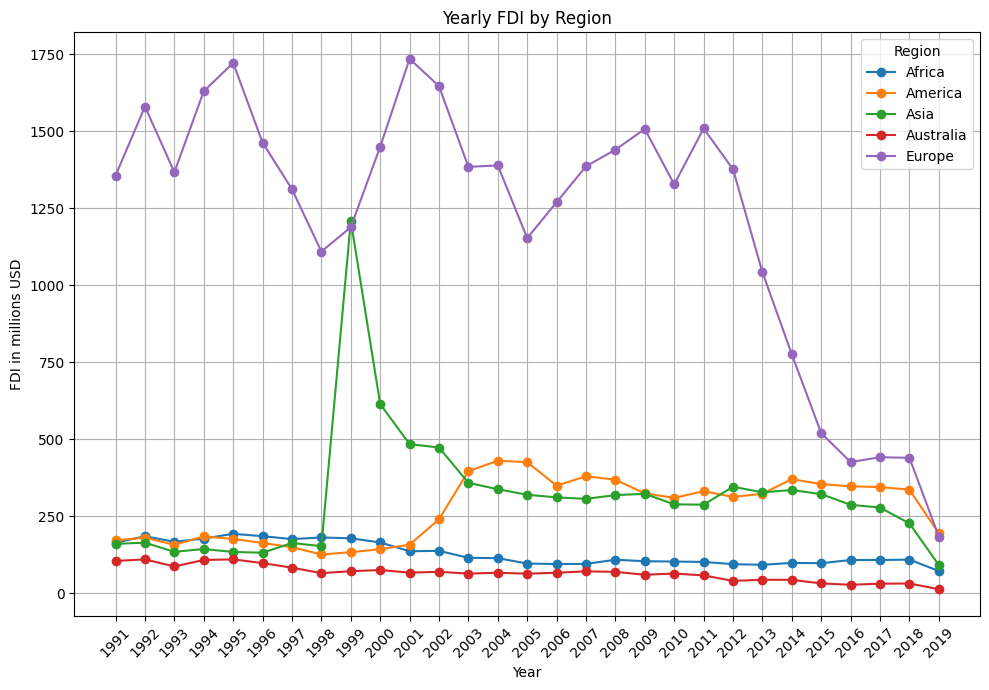

In [39]:
#plotting
pivot_data = grouped_data.pivot(index='Year', columns='Region', values='FDI')
plt.figure(figsize=(10, 7))  # Set the figure size for better readability
for region in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[region], label=region, marker='o')  # Plot each region

plt.title('Yearly FDI by Region')
plt.xlabel('Year')
plt.ylabel('FDI in millions USD')
plt.xticks(pivot_data.index, rotation=45)  # Set x-ticks to show every year and rotate them for better visibility
plt.legend(title='Region')
plt.grid(True)
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()

**Africa**: This region shows the most volatility. The peak in 1999 is particularly striking, where FDI soared to its highest at around 1750 million USD. After this peak, there's a noticeable decline, though it does spike again in the mid-2000s.

**America**: FDI in America is quite stable in comparison to other regions. There's a mild increase in the early 2000s, which levels off, maintaining a steady flow of investments until a gradual decrease starts towards the late 2010s.

**Asia**: Asia experiences a dramatic rise in FDI around 2001, surpassing 750 million USD, which then sharply declines and stabilizes at a much lower level, indicating a brief period of intense investment activity followed by a return to normalcy.

**Australia**: The FDI trend in Australia is consistently low throughout the period analyzed, with minor ups and downs but generally staying below 250 million USD.

**Europe**: Starting off on par with Australia, Europe sees a steady climb in FDI beginning in the mid-2000s, reaching a high around 2012, after which it mirrors the global downward trend.